# Problem Set 4

<div>
<img src="problems/1.png" width="600">
</div>

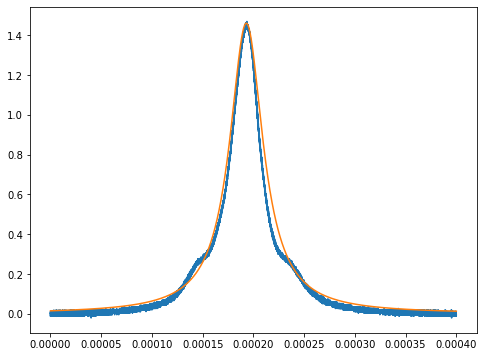

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("mcmc/sidebands.npz")
t = data['time']
d = data['signal']

#parameter guesses
a=1.46
t0=0.000193
w=0.00002

plt.figure(figsize=(8,6))
plt.plot(t,d)
plt.plot(t, a/(1+((t-t0)**2)/(w**2)))
plt.show()

<div>
<img src="problems/a.png" width="600">
</div>

The best fit parameters are:
a=1.42
t0=0.000192
w=1.79e-05


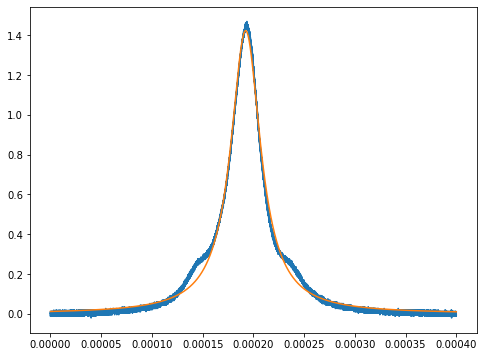

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("mcmc/sidebands.npz")
t = data['time']
d = data['signal']

def single_lorentz(params, t):
    a = params[0] 
    t0 = params[1]
    w = params[2]
    d = a/(1+((t-t0)**2)/(w**2)) #lorentzian equation
    ddda = 1/(1+((t-t0)**2)/(w**2)) #partial derivative w.r.t each parameter
    dddt0 = (2*a*(t-t0))/(w**2*(((t-t0)**2)/(w**2)+1)**2)
    dddw = (2*a*(t-t0)**2)/(w**3*(((t-t0)**2)/(w**2)+1)**2)
    A = np.empty([len(t), len(params)]) #creating A and filling it with our
    A[:,0] = ddda #partial derivatives in each row
    A[:,1] = dddt0
    A[:,2] = dddw
    return d, A

#param guess
guess = [1.46, 0.000193, 0.00002]

#Newton's method
for iter in range(10):
    pred, A = single_lorentz(guess,t)
    resid = d-pred
    LHS = A.T@A
    RHS = A.T@resid
    dg = np.linalg.inv(LHS)@RHS
    guess += dg

print('The best fit parameters are:\na={}\nt0={}\nw={}'.format(round(guess[0],2), round(guess[1],6), round(guess[2],7)))

Newt_fit, A = single_lorentz(guess, t)

plt.figure(figsize=(8,6))
plt.plot(t,d)
plt.plot(t,Newt_fit)
plt.show()

<div>
<img src="problems/b.png" width="600">
</div>

We can estimate the noise in the data to be 0.0194
The error estimates for each parameter are:
a:0.00033
t0:4.1e-09
w:5.8e-09


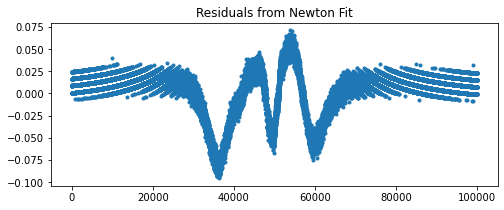

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#noise estimation
noise = np.mean(abs(Newt_fit-d))
print('We can estimate the noise in the data to be', round(noise,4))

#error in each parameter
errmat = np.sqrt(np.diag(np.linalg.inv(LHS)*noise**2)) #this addition of noise**2 to the
err_a = errmat[0] #covariance matrix comes from the fact that we ignored N initially when
err_t0 = errmat[1] #calculating the LHS, so we need to add it back in now that we have
err_w = errmat[2] #an estimate for it

print('The error estimates for each parameter are:\na:{}\nt0:{}\nw:{}'.format(round(err_a,5), round(err_t0,10), round(err_w,10)))

plt.figure(figsize=(8,3))
plt.title('Residuals from Newton Fit')
plt.plot(Newt_fit-d, '.')
plt.show()

As we can see from the graph above, there is clearly structure in the residuals, meaning that the equation we chose for our fit was not good for the data we gathered. Because of this, our estimation for the noise in the data will not be accurate.

<div>
<img src="problems/c.png" width="600">
</div>

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt

def partial_derivs(f, t, params):
    #dx = np.diag(1e-16**(1/3)*params) #finding optimal stepsize for each parameter (taken from pset1)
    #print(dx[0])
    #print(params)
    #A = np.empty([len(t), len(params)])
    #A[:,0] = (f(t, params+dx[0])-f(t, params))/dx[0][0]
    #for i in range(len(params)):
    #    A[:,i] = (f(t, params+dx[i])-f(t, params))/dx[i][i]
    #return A

def lorentz(t, params):
    return params[0]/(1+((t-params[1])**2)/(params[2]**2))

def single_lorentz_num(params, t):
    a = params[0]
    t0 = params[1]
    w = params[2]
    d = a/(1+((t-t0)**2)/(w**2))
    A = partial_derivs(lorentz, t, params)
    return d, A

#param guess
guess = np.array([1.46, 0.000193, 0.00002])

for iter in range(10):
    pred, A = single_lorentz_num(guess,t)
    resid = d-pred
    LHS = A.T@A
    RHS = A.T@resid
    dg = np.linalg.inv(LHS)@RHS
    guess += dg

print('The best fit parameters are:\na={}\nt0={}\nw={}'.format(round(guess[0],2), round(guess[1],6), round(guess[2],7)))

Newt_fit_num, A = single_lorentz_num(guess, t)

plt.figure(figsize=(8,6))
plt.plot(t,d)
plt.plot(t,Newt_fit_num)
plt.show()
'''

I couldn't figure out how to find the partial derivatives numerically, so for d) I just used the analytic derivatives.

<div>
<img src="problems/d.png" width="600">
</div>

The best fit parameters are:
a=1.44±0.00035
b=0.104±0.00034
c=0.065±0.00033
t0=0.000193±4.2e-09
w=1.61e-05±7.5e-09
dt=4.46e-05±5e-08


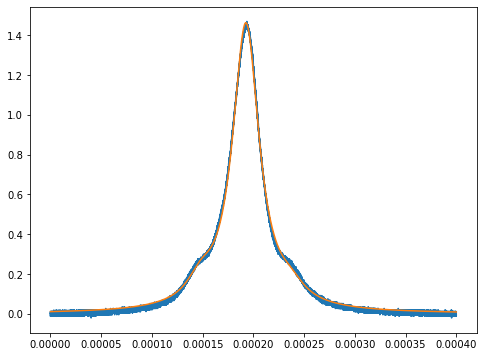

In [78]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("mcmc/sidebands.npz")
t = data['time']
d = data['signal']

def trip_lorentz(params, t):
    a = params[0]
    b = params[1]
    c = params[2]
    t0 = params[3]
    w = params[4]
    dt = params[5]
    
    y = a/(1+((t-t0)**2)/(w**2))+b/(1+((t-t0+dt)**2)/(w**2))+c/(1+((t-t0-dt)**2)/(w**2)) #triple lorentzian
    dyda = 1/(1+((t-t0)**2)/(w**2)) #partial derivatives for each parameter
    dydb = 1/(1+((t-t0+dt)**2)/(w**2))
    dydc = 1/(1+((t-t0-dt)**2)/(w**2))
    dydt0 = 2*a*(t-t0)/(w**2*((t-t0)**2/w**2+1)**2)+2*b*(t-t0+dt)/(w**2*((t-t0+dt)**2/w**2+1)**2)+2*c*(t-t0-dt)/(w**2*((t-t0-dt)**2/w**2+1)**2)
    dydw = 2*a*(t-t0)**2/(w**3*((t-t0)**2/w**2+1)**2)+2*b*(t-t0+dt)**2/(w**3*((t-t0+dt)**2/w**2+1)**2)+2*c*(t-t0-dt)**2/(w**3*((t-t0-dt)**2/w**2+1)**2)
    dyddt = 2*c*(t-t0-dt)/(w**2*((t-t0-dt)**2/w**2+1)**2)-2*b*(t-t0+dt)/(w**2*((t-t0+dt)**2/w**2+1)**2)
    
    A = np.empty([len(t), len(params)]) #making A like last time
    A[:,0] = dyda
    A[:,1] = dydb
    A[:,2] = dydc
    A[:,3] = dydt0
    A[:,4] = dydw
    A[:,5] = dyddt
    return y, A

#param guess
guess = [1.46, 0.2, 0.2, 0.000193, 0.000015, 0.00004]

#Newton's Method
for iter in range(10):
    pred, A = trip_lorentz(guess,t)
    resid = d-pred
    LHS = A.T@A
    RHS = A.T@resid
    dg = np.linalg.inv(LHS)@RHS
    guess += dg

#error in each parameter
errmat = np.sqrt(np.diag(np.linalg.inv(LHS)*noise**2))
err_a = errmat[0]
err_b = errmat[1]
err_c = errmat[2]
err_t0 = errmat[3]
err_w = errmat[4]
err_dt = errmat[5]

print('The best fit parameters are:\na={}±{}\nb={}±{}\nc={}±{}\nt0={}±{}\nw={}±{}\ndt={}±{}'.format(round(guess[0],2), round(err_a, 5), round(guess[1],3), round(err_b, 5), round(guess[2],3), round(err_c, 5), round(guess[3],6), round(err_t0, 10), round(guess[4],7), round(err_w, 10), round(guess[5],7), round(err_dt, 9)))

fit, A = trip_lorentz(guess, t)

plt.figure(figsize=(8,6))
plt.plot(t,d)
plt.plot(t,fit)
plt.show()

<div>
<img src="problems/e.png" width="600">
</div>

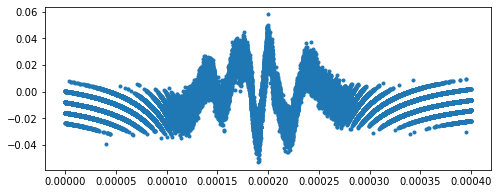

In [66]:
plt.figure(figsize=(8,3))
plt.plot(t,d-fit, '.')
plt.show()

I do not believe the error bars that I got. As explained before there is a clear trend in the residuals, indicating that the equation we used to fit our data is not representative of the data. This means that the model is not a complete description of the data, therefore the error bars for the parameters will not be accurate.

<div>
<img src="problems/f.png" width="600">
</div>

The typical difference between the chisquare for the perturbed parameters and the best fit parameters is  1.2580077093050932
Below are fits with our new perturbed parameters and we can see they are very similar to our fit with our best fit parameters


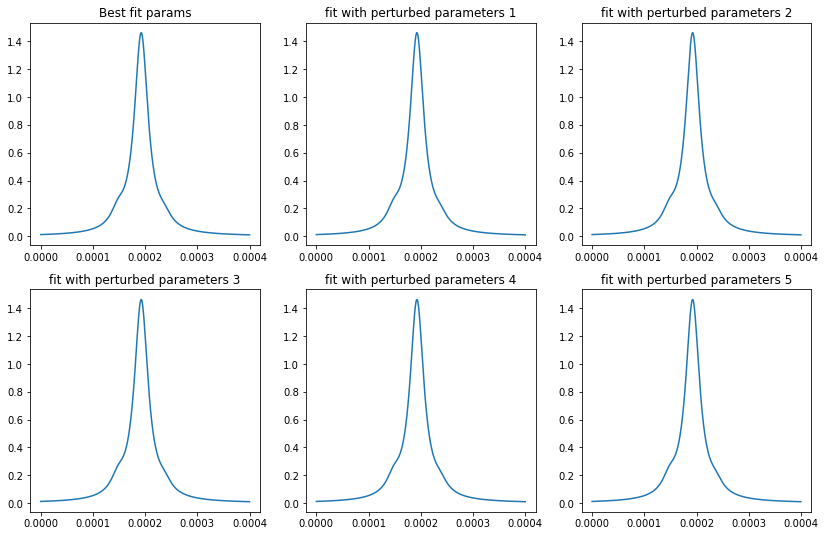

In [53]:
#random variations in the parameters using the covariance matrix
new_params = np.random.multivariate_normal(guess, np.linalg.inv(LHS)*noise**2, 5)

#calculating chisquares to compare later
fit_chsq = np.sum((d-fit)**2)/noise**2
new_chsqs = np.empty(len(new_params))

plt.figure(figsize=(14,9))
plt.subplot(2,3,1)
plt.title('Best fit params')
plt.plot(t, fit)

for i in range(5):
    fit, A = trip_lorentz(new_params[i], t) #plotting our new fits
    new_chsqs[i] = np.sum((d-fit)**2)/noise**2 #calculating chisquare of our new fits
    plt.subplot(2,3,i+2)
    plt.title('fit with perturbed parameters {}'.format(i+1))
    plt.plot(t, fit)

diff = np.mean(abs(fit_chsq-new_chsqs))
print('The typical difference between the chisquare for the perturbed parameters and the best fit parameters is ', diff )
print('Below are fits with our new perturbed parameters and we can see they are very similar to our fit with our best fit parameters')

The typical difference in $\chi^2$ for the perturbed parameters and the best fit parameters is reasonable, as we are generating our new parameters based off the covariance matrix we calculated previously, meaning we expect these new parameters to still be decently good fits to the data despite being slightly perturbed. Since we still expect the new parameters to be decent, we wouldn't expect a big difference in $\chi^2$ compared to our best fit parameter, which is what we observe.

<div>
<img src="problems/g.png" width="600">
</div>

In [61]:
#mcmc
nstep = 100000 #number of steps
covmat = np.linalg.inv(LHS)*noise**2 #just defining the covariance matrix
                                    #so I dont have to write it out again
def chsq_f(params , t, d, noise): #function to calculate chisquare
    fit, A = trip_lorentz(params, t) #calculates the fit with the new params
    chsq = np.sum((d-fit)**2)/noise**2 #and then the chisquare for the new fit
    return chsq

def MCMC(params, covmat, noise):
    chain=np.zeros([nstep,len(params)]) #initializing the chain
    chain[0,:]=params #start MCMC at our best fit params from newton's method
    chsq = chsq_f(chain[0,:], t, d, noise) #calculating our inital chisquare
    for i in range(1,nstep):
        new_params = chain[i-1,:]+np.random.multivariate_normal(np.zeros(len(params)), covmat)
        #take step in direction according to covariance matrix from initial position
        new_chsq = chsq_f(new_params, t, d, noise) #calculate chisquare with new params
        accept = np.exp(-0.5*(new_chsq-chsq)) #calculating acceptance
        if accept>np.random.rand(1): #choosing whether to accept or decline the step
            chain[i,:] = new_params
        else:
            chain[i,:] = chain[i-1,:]
    return chain

chain = MCMC(guess, covmat, noise)

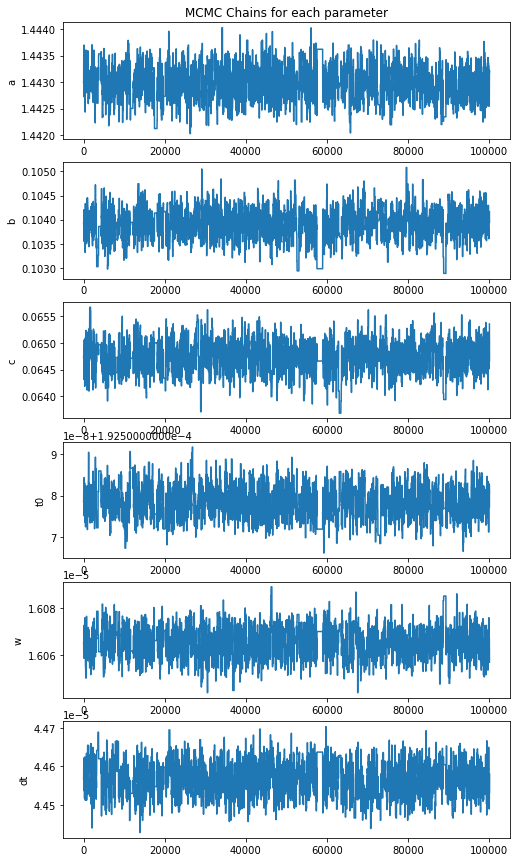

In [70]:
param_names = ['a', 'b', 'c', 't0', 'w', 'dt']

#plotting chains
plt.figure(figsize=(8,15))
plt.subplot(6,1,1)
plt.title('MCMC Chains for each parameter')
for i in range(len(guess)):
    plt.subplot(6,1,i+1)
    plt.plot(chain[:,i])
    plt.ylabel(param_names[i])

As we can see from the chains above for each parameter, none of them have a clear structure and they all vary about a clear mean, so we can assume that our chain is properly mixed.

In [69]:
#comparing the error bars
mcmc_params = np.empty(len(guess))
mcmc_errs = np.empty(len(guess))
for i in range(len(guess)):
    mcmc_params[i] = np.mean(chain[:,i])
    mcmc_errs[i] = np.std(chain[:,i])

print('Best Fit parameters and errors from Newton:\na={}±{}\nb={}±{}\nc={}±{}\nt0={}±{}\nw={}±{}\ndt={}±{}'.format(round(guess[0],2), round(err_a, 5), round(guess[1],3), round(err_b, 5), round(guess[2],3), round(err_c, 5), round(guess[3],6), round(err_t0, 10), round(guess[4],7), round(err_w, 10), round(guess[5],7), round(err_dt, 9)))
print('\nBest Fit parameters and errors from MCMC:\na={}±{}\nb={}±{}\nc={}±{}\nt0={}±{}\nw={}±{}\ndt={}±{}'.format(round(mcmc_params[0],2), round(mcmc_errs[0], 5), round(mcmc_params[1],3), round(mcmc_errs[1], 5), round(mcmc_params[2],3), round(mcmc_errs[2], 5), round(mcmc_params[3],6), round(mcmc_errs[3], 10), round(mcmc_params[4],7), round(mcmc_errs[4], 10), round(mcmc_params[5],7), round(mcmc_errs[5], 9)))

Best Fit parameters and errors from Newton:
a=1.44±0.00035
b=0.104±0.00034
c=0.065±0.00033
t0=0.000193±4.2e-09
w=1.61e-05±7.5e-09
dt=4.46e-05±5e-08

Best Fit parameters and errors from MCMC:
a=1.44±0.00034
b=0.104±0.00035
c=0.065±0.00032
t0=0.000193±4.1e-09
w=1.61e-05±7.1e-09
dt=4.46e-05±4.5e-08


Even after performing the MCMC, the error bars have barely changed, which means that our original best fit parameters from Newton's method were quite accurate (or at least as accurate as you could get by fitting our data with an equation that doesn't properly represent it).

<div>
<img src="problems/h.png" width="600">
</div>

In [76]:
#dt maps to 9GHz, but dt is in time, so 1/dt --> 9Ghz

scale = 9e9/mcmc_params[5] #scaling factor from the mapping
print('The actual width of the cavity resonance in GHz is {}GHz'.format(round(mcmc_params[4]*scale/1e9, 2)))

The actual width of the cavity resonance in GHz is 3.24GHz
